In [1]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create folder to save dataset
base_dir = '../../data/'
raw_dir = os.path.join(base_dir, 'raw')
curated_dir = os.path.join(base_dir, 'curated')
manual_dir = os.path.join(base_dir, 'manual')
landing_dir = os.path.join(base_dir, 'landing')

if not os.path.exists(base_dir):
    os.makedirs(base_dir)

if not os.path.exists(curated_dir):
    os.makedirs(curated_dir)

In [3]:
# read data
df = pd.read_csv(f"{raw_dir}/individual_property_with_crime2023.csv")
top_school = pd.read_csv(f"{landing_dir}/ABS_top50_school/vce_top_50_schools.csv")

In [4]:
df.head(5)

,Address,Cost,Bedrooms,Bathrooms,Coordinates,Closest Gov Secondary School,Gov Secondary Distance,Age under 20,Age 20-39,Age 40-59,...,CBD Distance,Train Distance,Electricity Distance,Hospital Distance,Library Distance,Park Distance,Tourist Attraction Distance,Grocery Distance,Local Government Area,Incidents Recorded
0,"901/22-40 Wills Street, Melbourne VIC 3000",$600 per week,1.0,1.0,"[-37.8107551, 144.9570001]",University High School,1.5 km away,8%,77%,12%,...,0.9271,0.6166,0.8477,1.6536,1.5615,0.3633,1.3194,0.4771,Melbourne,"25,019"
1,"1207/270 King Street, Melbourne VIC 3000",$720 per week,2.0,2.0,"[-37.8136918, 144.9548583]",University High School,1.9 km away,6%,83%,10%,...,0.9381,0.5685,1.3123,1.7040,1.7147,1.0145,0.8704,0.4587,Melbourne,"25,019"
2,"5809/442 ELIZABETH STREET, Melbourne VIC 3000",$850 Per Week ( Fully Furnished),2.0,1.0,"[-37.8084101, 144.9607759]",University High School,1.3 km away,3%,90%,7%,...,0.6115,1.4196,0.8981,1.2886,1.1995,0.4621,0.9574,0.1615,Melbourne,"25,019"
3,"2112/80 A'beckett Street, Melbourne VIC 3000",$700 per week,2.0,2.0,"[-37.8089991, 144.9610792]",University High School,1.4 km away,3%,90%,7%,...,0.5422,1.3504,0.8288,1.2193,1.1303,0.3928,0.8882,0.0923,Melbourne,"25,019"
4,"1210/81 A'beckett Street, Melbourne VIC 3000",$650 weekly,2.0,1.0,"[-37.8092536, 144.961181]",University High School,1.4 km away,6%,79%,12%,...,0.5421,1.3502,0.8287,1.2192,1.1301,0.3927,0.8881,0.0921,Melbourne,"25,019"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       8002 non-null   object 
 1   Cost                          8002 non-null   object 
 2   Bedrooms                      7979 non-null   float64
 3   Bathrooms                     7979 non-null   float64
 4   Coordinates                   8002 non-null   object 
 5   Closest Gov Secondary School  6907 non-null   object 
 6   Gov Secondary Distance        6907 non-null   object 
 7   Age under 20                  7802 non-null   object 
 8   Age 20-39                     7802 non-null   object 
 9   Age 40-59                     7802 non-null   object 
 10  Age 60+                       7802 non-null   object 
 11  Postcode                      8002 non-null   int64  
 12  latitude                      8002 non-null   float64
 13  lon

# Merge

In [6]:
# Highlight property close to top 50 school
top_50_school_list = top_school['School'].tolist()
df['Top 50 School'] = df['Closest Gov Secondary School'].apply(lambda x: 1 if x in top_50_school_list else 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       8002 non-null   object 
 1   Cost                          8002 non-null   object 
 2   Bedrooms                      7979 non-null   float64
 3   Bathrooms                     7979 non-null   float64
 4   Coordinates                   8002 non-null   object 
 5   Closest Gov Secondary School  6907 non-null   object 
 6   Gov Secondary Distance        6907 non-null   object 
 7   Age under 20                  7802 non-null   object 
 8   Age 20-39                     7802 non-null   object 
 9   Age 40-59                     7802 non-null   object 
 10  Age 60+                       7802 non-null   object 
 11  Postcode                      8002 non-null   int64  
 12  latitude                      8002 non-null   float64
 13  lon

In [7]:
df.head(5)

,Address,Cost,Bedrooms,Bathrooms,Coordinates,Closest Gov Secondary School,Gov Secondary Distance,Age under 20,Age 20-39,Age 40-59,...,Train Distance,Electricity Distance,Hospital Distance,Library Distance,Park Distance,Tourist Attraction Distance,Grocery Distance,Local Government Area,Incidents Recorded,Top 50 School
0,"901/22-40 Wills Street, Melbourne VIC 3000",$600 per week,1.0,1.0,"[-37.8107551, 144.9570001]",University High School,1.5 km away,8%,77%,12%,...,0.6166,0.8477,1.6536,1.5615,0.3633,1.3194,0.4771,Melbourne,"25,019",0
1,"1207/270 King Street, Melbourne VIC 3000",$720 per week,2.0,2.0,"[-37.8136918, 144.9548583]",University High School,1.9 km away,6%,83%,10%,...,0.5685,1.3123,1.7040,1.7147,1.0145,0.8704,0.4587,Melbourne,"25,019",0
2,"5809/442 ELIZABETH STREET, Melbourne VIC 3000",$850 Per Week ( Fully Furnished),2.0,1.0,"[-37.8084101, 144.9607759]",University High School,1.3 km away,3%,90%,7%,...,1.4196,0.8981,1.2886,1.1995,0.4621,0.9574,0.1615,Melbourne,"25,019",0
3,"2112/80 A'beckett Street, Melbourne VIC 3000",$700 per week,2.0,2.0,"[-37.8089991, 144.9610792]",University High School,1.4 km away,3%,90%,7%,...,1.3504,0.8288,1.2193,1.1303,0.3928,0.8882,0.0923,Melbourne,"25,019",0
4,"1210/81 A'beckett Street, Melbourne VIC 3000",$650 weekly,2.0,1.0,"[-37.8092536, 144.961181]",University High School,1.4 km away,6%,79%,12%,...,1.3502,0.8287,1.2192,1.1301,0.3927,0.8881,0.0921,Melbourne,"25,019",0


# Preprocessing

In [8]:
df.shape

(8002, 29)

In [9]:
# duplicate record
duplicate_rows = df[df.duplicated()]
print(f"duplicate records: {duplicate_rows.shape[0]}")

duplicate records: 50


In [10]:
df_cleaned = df.drop_duplicates()
df_cleaned.shape

(7952, 29)

In [11]:
# missing value
missing_values = df_cleaned.isnull().sum()
print("number of missing value in each column：")
print(missing_values)

number of missing value in each column：
Address                            0
Cost                               0
Bedrooms                          23
Bathrooms                         23
Coordinates                        0
Closest Gov Secondary School    1094
Gov Secondary Distance          1094
Age under 20                     200
Age 20-39                        200
Age 40-59                        200
Age 60+                          200
Postcode                           0
latitude                           0
longitude                          0
SA2  code                          7
income_2020                        7
2023                               7
2026                               7
CBD Distance                       0
Train Distance                     0
Electricity Distance               0
Hospital Distance                  0
Library Distance                   0
Park Distance                      0
Tourist Attraction Distance        0
Grocery Distance                   

In [12]:
# deal with missing value - 'bedroom', 'bathroom'
filtered_df = df_cleaned.dropna(subset=['Bedrooms', 'Bathrooms'])
filtered_df.shape

(7929, 29)

In [13]:
filtered_df.describe()

,Bedrooms,Bathrooms,Postcode,latitude,longitude,SA2 code,2023,2026,CBD Distance,Train Distance,Electricity Distance,Hospital Distance,Library Distance,Park Distance,Tourist Attraction Distance,Grocery Distance,Top 50 School
count,7929.000000,7929.000000,7929.000000,7929.000000,7929.000000,7.923000e+03,7923.000000,7923.000000,7929.000000,7929.000000,7929.000000,7929.000000,7929.000000,7929.000000,7929.000000,7929.000000,7929.000000
mean,2.784084,1.579140,3275.938202,-37.755123,144.915180,2.086972e+08,16048.413101,17088.007179,56.362100,9.398790,10.907143,5.587091,4.059012,1.022346,11.002332,3.819675,0.004414
std,1.028501,0.643467,285.618882,0.781615,2.406084,3.818697e+06,5499.784343,6486.318093,81.000429,27.445476,15.633486,11.506837,11.535150,1.606051,16.493438,11.450737,0.066297
min,0.000000,0.000000,3000.000000,-38.825069,0.000000,2.010110e+08,2493.000000,2648.710972,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,1.000000,3073.000000,-37.935081,144.865209,2.060415e+08,12421.000000,12787.773987,11.875200,1.250000,4.097300,1.550300,1.241700,0.386700,3.991100,1.033500,0.000000
50%,3.000000,2.000000,3166.000000,-37.821686,145.002993,2.080312e+08,15584.000000,16461.092644,23.950400,2.332000,6.726400,2.800900,2.086100,0.654500,7.640200,1.715100,0.000000
75%,3.000000,2.000000,3352.000000,-37.736833,145.129547,2.120413e+08,20035.000000,20961.937815,64.277200,4.763400,10.674600,5.760400,3.653600,1.085400,13.134700,2.800400,0.000000
max,9.000000,12.000000,3996.000000,0.000000,149.756799,2.170415e+08,31976.000000,41470.660358,552.518100,235.967200,242.131400,198.574400,213.380200,36.933400,211.316400,203.636700,1.000000


# Simplified data

In [14]:
filtered_df.iloc[1]

Address                         1207/270 King Street, Melbourne VIC 3000
Cost                                                       $720 per week
Bedrooms                                                             2.0
Bathrooms                                                            2.0
Coordinates                                   [-37.8136918, 144.9548583]
Closest Gov Secondary School                      University High School
Gov Secondary Distance                                       1.9 km away
Age under 20                                                          6%
Age 20-39                                                            83%
Age 40-59                                                            10%
Age 60+                                                               1%
Postcode                                                            3000
latitude                                                      -37.813692
longitude                                          

In [15]:
# Helper function to extract the numeric part after the first "$"
def extract_first_dollar_amount(value):
    # Search for the numeric part following the first $
    match = re.search(r'\$(\d{1,3}(?:,\d{3})*(?:\.\d{2})?)', value)
    if match:
        # Remove any commas from the matched value and convert to float
        return float(match.group(0).replace(',', '').replace('$', ''))
    return None  # If no match is found, return None

# Apply the function to the 'Cost' column
filtered_df['Cost(numeric)'] = filtered_df['Cost'].apply(lambda x: extract_first_dollar_amount(str(x)))

# Display one row to verify
# filtered_df.iloc[1]

/var/folders/gv/pbj7gd456sj494dw3tvm283r0000gn/T/ipykernel_46327/1039729185.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cost(numeric)'] = filtered_df['Cost'].apply(lambda x: extract_first_dollar_amount(str(x)))


In [16]:
# Simplified 'Gov Secondary Distance'
# Skip NaN values
# Extract numeric values

# Helper function to extract the numeric part from 'Gov Secondary Distance' and handle NaN and invalid values
def extract_numeric_distance(value):
    if pd.isna(value):  # Check if the value is NaN
        return None
    match = re.search(r'(\d+\.?\d*)', value)  # Search for the numeric part
    if match:
        return float(match.group(1))  # Return the matched numeric part
    return None  # If no valid numeric value is found, return None

filtered_df['Gov Secondary Distance (numeric)'] = filtered_df['Gov Secondary Distance'].apply(lambda x: extract_numeric_distance(str(x)))
filtered_df.iloc[1]


/var/folders/gv/pbj7gd456sj494dw3tvm283r0000gn/T/ipykernel_46327/2147506844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Gov Secondary Distance (numeric)'] = filtered_df['Gov Secondary Distance'].apply(lambda x: extract_numeric_distance(str(x)))


Address                             1207/270 King Street, Melbourne VIC 3000
Cost                                                           $720 per week
Bedrooms                                                                 2.0
Bathrooms                                                                2.0
Coordinates                                       [-37.8136918, 144.9548583]
Closest Gov Secondary School                          University High School
Gov Secondary Distance                                           1.9 km away
Age under 20                                                              6%
Age 20-39                                                                83%
Age 40-59                                                                10%
Age 60+                                                                   1%
Postcode                                                                3000
latitude                                                          -37.813692

# Drop unrelevant column by domain knowledge

In [17]:
df_drop = filtered_df.drop(['Cost', 'Gov Secondary Distance', 'Coordinates', 'Local Government Area'], axis=1)
df_drop = df_drop.rename(columns={'Cost(numeric)': 'Cost', 'Gov Secondary Distance (numeric)': 'Gov Secondary Distance'})
df_drop.iloc[1]

Address                         1207/270 King Street, Melbourne VIC 3000
Bedrooms                                                             2.0
Bathrooms                                                            2.0
Closest Gov Secondary School                      University High School
Age under 20                                                          6%
Age 20-39                                                            83%
Age 40-59                                                            10%
Age 60+                                                               1%
Postcode                                                            3000
latitude                                                      -37.813692
longitude                                                     144.954858
SA2  code                                                    206041505.0
income_2020                                                       59,201
2023                                               

# Remove Outlier

In [18]:
def plot_boxplots(df, feature):
    """
    Plots a box plot for a specified column in the DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing numeric feature columns.
    feature (str): The column that you want to observe.
    """
    # Set up the figure
    plt.figure(figsize=(8, 6))

    # Boxplot for the feature
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

    # Show the plot
    plt.tight_layout()
    plt.show()

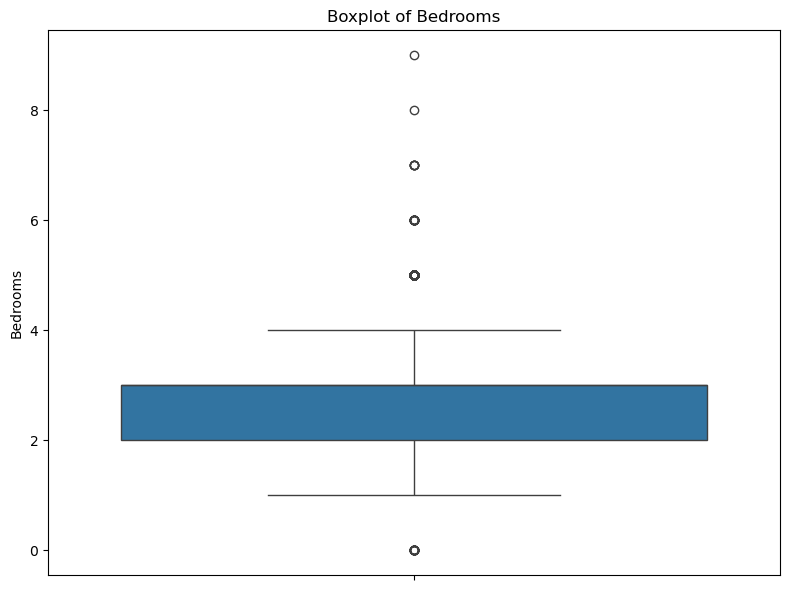

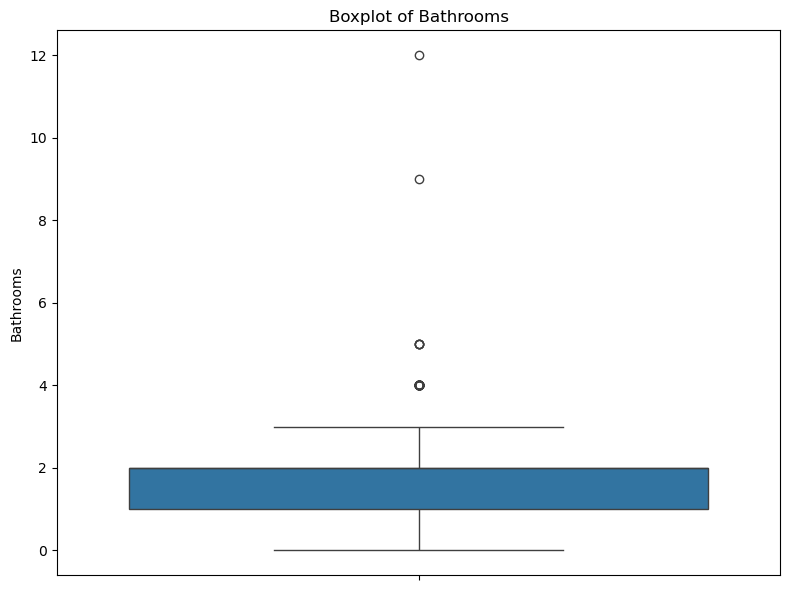

In [19]:
plot_boxplots(df_drop, 'Bedrooms')  # For Bedrooms
plot_boxplots(df_drop, 'Bathrooms')  # For Bathrooms

In [20]:
df_drop.shape

(7929, 27)

In [21]:
def outlier_remover(df, column_name):
    """
    Removes outliers from a specified column in the DataFrame using the IQR method with a custom multiplier for N > 100.

    Parameters:
    df (pandas.DataFrame): The DataFrame to process.
    column_name (str): The name of the column from which to remove outliers.

    Returns:
    pandas.DataFrame: DataFrame with outliers removed.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Get the number of records (N)
    N = len(df)
    
    # Apply the formula for N > 100
    multiplier = np.sqrt(np.log(N) - 0.5)
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Filter the DataFrame to exclude outliers
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df

In [22]:
df_drop = outlier_remover(df_drop, 'Bedrooms')
df_drop = outlier_remover(df_drop, 'Bathrooms')
df_drop = outlier_remover(df_drop, 'Cost')


# Convert DataType

In [23]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7470 entries, 0 to 8001
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       7470 non-null   object 
 1   Bedrooms                      7470 non-null   float64
 2   Bathrooms                     7470 non-null   float64
 3   Closest Gov Secondary School  6430 non-null   object 
 4   Age under 20                  7290 non-null   object 
 5   Age 20-39                     7290 non-null   object 
 6   Age 40-59                     7290 non-null   object 
 7   Age 60+                       7290 non-null   object 
 8   Postcode                      7470 non-null   int64  
 9   latitude                      7470 non-null   float64
 10  longitude                     7470 non-null   float64
 11  SA2  code                     7464 non-null   float64
 12  income_2020                   7464 non-null   object 
 13  2023    

In [24]:
# convert to string type
string_columns = ['Address', 'Closest Gov Secondary School']
df_drop[string_columns] = df_drop[string_columns].astype(str)

In [25]:
# convert to float type, and remove ',' and '%'
columns_to_convert = df_drop.columns.difference(string_columns)

df_drop[columns_to_convert] = df_drop[columns_to_convert].replace({',': '', '%': ''}, regex=True).astype(float)
df_drop.iloc[1]

Address                         1207/270 King Street, Melbourne VIC 3000
Bedrooms                                                             2.0
Bathrooms                                                            2.0
Closest Gov Secondary School                      University High School
Age under 20                                                         6.0
Age 20-39                                                           83.0
Age 40-59                                                           10.0
Age 60+                                                              1.0
Postcode                                                          3000.0
latitude                                                      -37.813692
longitude                                                     144.954858
SA2  code                                                    206041505.0
income_2020                                                      59201.0
2023                                               

In [26]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7470 entries, 0 to 8001
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       7470 non-null   object 
 1   Bedrooms                      7470 non-null   float64
 2   Bathrooms                     7470 non-null   float64
 3   Closest Gov Secondary School  7470 non-null   object 
 4   Age under 20                  7290 non-null   float64
 5   Age 20-39                     7290 non-null   float64
 6   Age 40-59                     7290 non-null   float64
 7   Age 60+                       7290 non-null   float64
 8   Postcode                      7470 non-null   float64
 9   latitude                      7470 non-null   float64
 10  longitude                     7470 non-null   float64
 11  SA2  code                     7464 non-null   float64
 12  income_2020                   7464 non-null   float64
 13  2023    

# Missing value

In [27]:
# missing value
print("number of missing value in each column：")
print(df_drop.isnull().sum())

number of missing value in each column：
Address                            0
Bedrooms                           0
Bathrooms                          0
Closest Gov Secondary School       0
Age under 20                     180
Age 20-39                        180
Age 40-59                        180
Age 60+                          180
Postcode                           0
latitude                           0
longitude                          0
SA2  code                          6
income_2020                        6
2023                               6
2026                               6
CBD Distance                       0
Train Distance                     0
Electricity Distance               0
Hospital Distance                  0
Library Distance                   0
Park Distance                      0
Tourist Attraction Distance        0
Grocery Distance                   0
Incidents Recorded               455
Top 50 School                      0
Cost                               

In [28]:
# remove record with missing 'Cost', 'SA2_code', 'income_2020', '2023','2026'
df_drop = df_drop.dropna(subset=['Cost', 'SA2  code', 'income_2020', '2023', '2026'])

In [29]:
# fill in missing value in 'Incidents Recorded' by average CRIMINAL INCIDENT RATE in Victoria
df_drop['Incidents Recorded'] = df_drop['Incidents Recorded'].fillna(5279.3)

In [30]:
# fill in missing value in 'Gov Secondary Distance' by -1 to represent no close school
df_drop['Gov Secondary Distance'] = df_drop['Gov Secondary Distance'].fillna(-1)

In [31]:
# fill in missing value in 'Age under 20', 'Age 20-39', 'Age 40-59' and 'Age 60+' by mean value
columns_to_fill = ['Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+']

for column in columns_to_fill:
    df_drop[column] = df_drop[column].fillna(df_drop[column].mean())


In [32]:
# missing value
print("number of missing value in each column：")
print(df_drop.isnull().sum())

number of missing value in each column：
Address                         0
Bedrooms                        0
Bathrooms                       0
Closest Gov Secondary School    0
Age under 20                    0
Age 20-39                       0
Age 40-59                       0
Age 60+                         0
Postcode                        0
latitude                        0
longitude                       0
SA2  code                       0
income_2020                     0
2023                            0
2026                            0
CBD Distance                    0
Train Distance                  0
Electricity Distance            0
Hospital Distance               0
Library Distance                0
Park Distance                   0
Tourist Attraction Distance     0
Grocery Distance                0
Incidents Recorded              0
Top 50 School                   0
Cost                            0
Gov Secondary Distance          0
dtype: int64


In [33]:
# Save the updated DataFrame if needed
df_drop.to_csv("../../data/curated/individual_property_final.csv", index=False)